<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-данных-и-подготовка-к-их-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-к-их-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и подготовка к их анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-воронку-событий" data-toc-modified-id="Изучение-воронку-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронку событий</a></span><ul class="toc-item"><li><span><a href="#Расчет-воронки" data-toc-modified-id="Расчет-воронки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет воронки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-теста" data-toc-modified-id="Вывод-по-результатам-теста-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по результатам теста</a></span></li><li><span><a href="#группа-с-изменённым-шрифтом" data-toc-modified-id="группа-с-изменённым-шрифтом-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>группа с изменённым шрифтом</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Введение

Мы работаем в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.

## Загрузка данных и подготовка к их анализу

In [1]:
#Загружаем полезные стандартные библиотеки
import pandas as pd 
from pymystem3 import Mystem as m 
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import math as mth
pd.set_option('display.max_columns', None)
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os # для проверки правильности загрузки данных
import matplotlib.ticker as ticker # библ. для тиков на осях
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
## Функция для предварительного анализа
def preanalis(dataset):
    dataset.info()
    print()
    print('кол-во дубликатов', dataset.duplicated().sum())
    print()
    print('Пропуски')
    print(dataset.isnull().sum())
    print()
    print('Характерисики значений')
    print(dataset.describe())

In [3]:
pth1 = '/datasets/logs_exp.csv'

if os.path.exists(pth1) :
    data = pd.read_csv(pth1,sep= '\t')
else:
    print('Ничего не получилось =(')

In [4]:
try:
    data = pd.read_csv("/datasets/logs_exp.csv",sep= '\t')
except:
    print('Ничего не получилось =(')

In [5]:
data.head(1)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246


**Описание данных:**  
Каждая запись в логе — это действие пользователя, или событие.  
- EventName — название события;  
- DeviceIDHash — уникальный идентификатор пользователя;  
- EventTimestamp — время события;  
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.  

In [6]:
# Приведем столбцы к змеиному регистру
data.rename(columns={'EventName': 'event','DeviceIDHash': 'id','EventTimestamp': 'event_date','ExpId': 'group'}, inplace=True)

In [7]:
data.head(1)

,event,id,event_date,group
0,MainScreenAppear,4575588528974610257,1564029816,246


In [8]:
data['event_date'] = pd.to_datetime(data['event_date'], unit='s')

In [9]:
#Выделяем столбцы с временем и датой
data['time'] =data['event_date'].dt.time
data['date'] =data['event_date'].dt.date.astype('datetime64')

In [10]:
data.head(1) # Проверяем

,event,id,event_date,group,time,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,04:43:36,2019-07-25


In [11]:
preanalis(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       244126 non-null  object        
 1   id          244126 non-null  int64         
 2   event_date  244126 non-null  datetime64[ns]
 3   group       244126 non-null  int64         
 4   time        244126 non-null  object        
 5   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 11.2+ MB

кол-во дубликатов 413

Пропуски
event         0
id            0
event_date    0
group         0
time          0
date          0
dtype: int64

Характерисики значений
                                id      group
count                   244,126.00 244,126.00
mean  4,627,568,124,591,259,648.00     247.02
std   2,642,424,998,963,961,856.00       0.82
min       6,888,746,892,508,752.00     246.00
25%   2,372,212,476,992,240,640.

In [12]:
#Посмотрим на повторы поближе
data[data.duplicated(keep=False)].head(20)

,event,id,event_date,group,time,date
452,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248,08:19:44,2019-07-30
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248,08:19:44,2019-07-30
2348,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248,21:51:39,2019-07-31
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248,21:51:39,2019-07-31
3572,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248,02:59:37,2019-08-01
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248,02:59:37,2019-08-01
4075,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247,03:47:46,2019-08-01
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247,03:47:46,2019-08-01
4801,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248,04:44:01,2019-08-01
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248,04:44:01,2019-08-01


In [13]:
## Похоже, что идет простое дублирование информации. Удаление дубликатов не повлияет на результат анализа
data = data.drop_duplicates(keep='last')
preanalis(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   id          243713 non-null  int64         
 2   event_date  243713 non-null  datetime64[ns]
 3   group       243713 non-null  int64         
 4   time        243713 non-null  object        
 5   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 13.0+ MB

кол-во дубликатов 0

Пропуски
event         0
id            0
event_date    0
group         0
time          0
date          0
dtype: int64

Характерисики значений
                                id      group
count                   243,713.00 243,713.00
mean  4,627,962,820,816,199,680.00     247.02
std   2,642,723,221,505,612,288.00       0.82
min       6,888,746,892,508,752.00     246.00
25%   2,372,212,476,992,240,640.00

In [14]:
# Также стоит изменить тип данных для экономии места
data['event'] = data['event'].astype('category')
data['group'] = data['group'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  category      
 1   id          243713 non-null  int64         
 2   event_date  243713 non-null  datetime64[ns]
 3   group       243713 non-null  category      
 4   time        243713 non-null  object        
 5   date        243713 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(1), object(1)
memory usage: 9.8+ MB


Экономия составила примерно 3.2 МБ.

### Вывод
Данные действий пользователей загружены. Было сделано следующее: 
1. Были дубликаты, а именно : задублировались события, их удаление не повлияет на результат анализа. 
2. Регистр переведен в змеиный.
3. Изменен тип данных в нескольких столбцах для экономии места.
4. Пропусков значений в стобцах не обнаружено.
5. Добавлены столбцы со временем и датой.
В ходе этих действий мы подготовили данные к анализу.

## Изучение и проверка данных

In [15]:
print('В логе всего событий:',data['event'].count()
     , 'и они распределены следующим образом:\n',
      data['event'].value_counts() )

В логе всего событий: 243713 и они распределены следующим образом:
 MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64


In [16]:
print('В логе всего уникальных пользователей:',data['id'].nunique())

В логе всего уникальных пользователей: 7551


In [17]:
print('В среднем:',round(data['event'].count()/data['id'].nunique(),2),'событий приходится на пользователя:')

В среднем: 32.28 событий приходится на пользователя:


In [18]:
print('Самая ранняя дата:', data.date.min(),
      'Самая поздняя дата:', data.date.max())

Самая ранняя дата: 2019-07-25 00:00:00 Самая поздняя дата: 2019-08-07 00:00:00


<AxesSubplot:title={'center':'Распределение по дате'}, xlabel='date'>

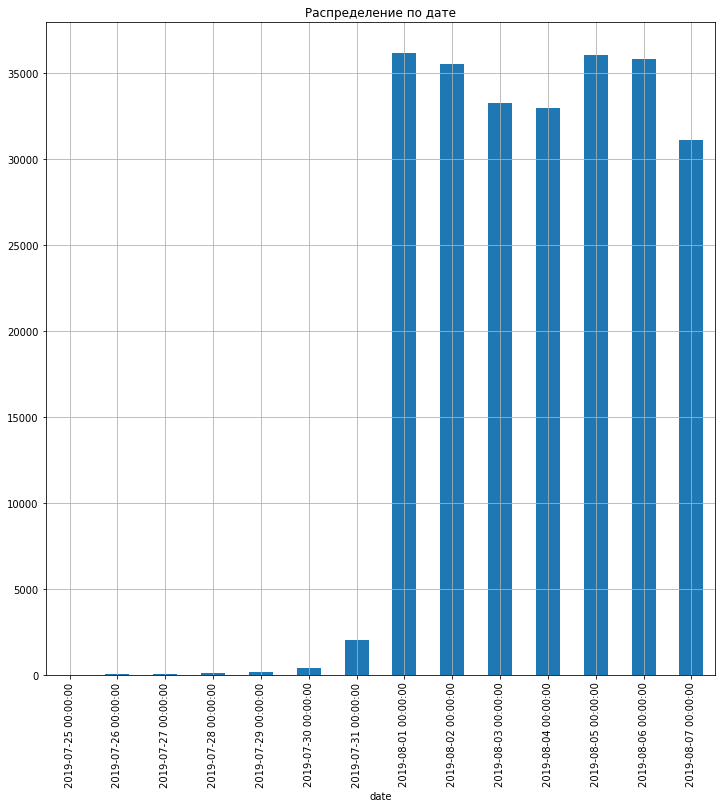

In [19]:
data_date = data.groupby('date')['id'].count().reset_index()
data_date.plot(
    x='date',
    y='id',
    kind='bar',
    grid=True,
    title='Распределение по дате',
    legend=False,
    figsize = (12,12)
)

Итак, судя по всему нам стоит оставить данные только начиная с 2019-08-01. До что до этой даты похоже на доехавшие события. Их намного меньше!

In [20]:
filt_data = data[data['date']>='2019-08-01']
print('Мы потеряли:',round(((data['event'].count() - filt_data['event'].count()) / data['event'].count())*100,2) ,'% событий, отбросив доехавшие данные')

Мы потеряли: 1.16 % событий, отбросив доехавшие данные


In [21]:
filt_data['group'].value_counts()

248    84563
246    79302
247    77022
Name: group, dtype: int64

In [22]:
print('Мы потеряли:',round(((data['id'].nunique() - filt_data['id'].nunique()) / data['id'].nunique())*100,2) ,'% уникальных пользоватлей, отбросив доехавшие данные')

Мы потеряли: 0.23 % уникальных пользоватлей, отбросив доехавшие данные


### Вывод
Мы проверели данные. Было обнаружено странное распределния по датам. Мы отсекли даты, где было мало событий, и убираем 1.16 % событий. Таким образом мы будем опперировать данными, начиная с 2019-08-01. 

## Изучение воронку событий

In [23]:
filt_data['event'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

In [24]:
filt_data.groupby('event').agg({'id': 'nunique'}).sort_values(by='id', ascending=False)

,id
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


Предполагаемый порядок событий:  
1. Главный экран
2. Экран предложения(покупки)
3. Оформление заказа
4. Успешная оплата

Посмотрим на событие предшествующее оплате.

In [25]:
test = filt_data.copy(deep=True)

In [26]:
test = test.sort_values(['id','event_date'])

In [27]:
test['diff'] = test.groupby('id')['event_date'].diff(1)

In [28]:
test['pr'] = test.groupby('id')['event'].shift(1)

In [29]:
test[test['event']=='PaymentScreenSuccessful']['pr'].value_counts()

CartScreenAppear           19819
MainScreenAppear            5695
OffersScreenAppear          5357
PaymentScreenSuccessful     2950
Tutorial                       1
Name: pr, dtype: int64

Видно, что на сайте также рабоатет покупка в один клик, но все равно большинство покупок идет из корзины.

### Расчет воронки

In [30]:
fun = filt_data.groupby('event').agg({'id': 'nunique'}).sort_values(by='id', ascending=False).reset_index()
fun = fun[fun['event'] != 'Tutorial']
fun['конверсия, %'] = round(fun['id'] / 7419 *100,2)
fun['конверсия в шаг, %'] = round(fun['id'] / fun['id'].shift(1) *100,2)
fun

,event,id,"конверсия, %","конверсия в шаг, %"
0,MainScreenAppear,7419,100.00,NaN
1,OffersScreenAppear,4593,61.91,61.91
2,CartScreenAppear,3734,50.33,81.30
3,PaymentScreenSuccessful,3539,47.70,94.78


### Вывод
При изучении воронки мы выявили следующее:
1. В общем цепочка событий обычная, но встречаются переходы сразу на платежку, это может быть связано с окноами покупки в один клик
2. Больше всего клиентов теряется на окне предложения.
3. Почти половина пользователей доходит до покупок.


##  Изучение результатов эксперимента

In [31]:
#КОД РЕВЬЮЕРА
filt_data.groupby('id').agg({'group': 'nunique'}).query('group>1')

,group
id,


In [32]:
flickers = filt_data.loc[filt_data["group"]==246,'id']\
.isin(filt_data.loc[filt_data["group"]==247, 'id']) ## получаем индексы, где есть фликеры
flickers.sum()
#orders = orders.drop(flickers[flickers].index) ## удаляем их
#orders.info()

0

In [33]:
flickers = filt_data.loc[filt_data["group"]==247,'id']\
.isin(filt_data.loc[filt_data["group"]==248, 'id']) ## получаем индексы, где есть фликеры
flickers.sum()

0

In [34]:
flickers = filt_data.loc[filt_data["group"]==246,'id']\
.isin(filt_data.loc[filt_data["group"]==248, 'id']) ## получаем индексы, где есть фликеры
flickers.sum()

0

<div class="alert alert-info">
<b>Комментарий студента:</b> Ну,кажется, их нет =)
 
</div>

In [35]:
filt_data.groupby('group').agg({'id': 'nunique'})

,id
group,
246,2484
247,2513
248,2537


In [36]:
#group_a = filt_data[filt_data['group'] == 246].groupby('date').agg({'id': 'nunique'})
#group_aа = filt_data[filt_data['group'] == 247].groupby('date').agg({'id': 'nunique'})

In [37]:
#alpha =  0.05 # как общепринято =)
#results = st.ttest_ind(group_a,group_aа)
#print('p-значение:', results.pvalue)

#if results.pvalue < alpha:
#    print('Отвергаем нулевую гипотезу')
#else:
#    print('Не получилось отвергнуть нулевую гипотезу') 

In [38]:
def sts (data_1, data_2, event):

    alpha=0.05
    clients_1 = data_1['id'].nunique()
    clients_2 = data_2['id'].nunique()

    bueyrs_1 = data_1.query('event == @event')['id'].nunique()
    bueyrs_2 = data_2.query('event == @event')['id'].nunique()
# пропорция успехов в группах
    p1 = bueyrs_1/clients_1
    p2 = bueyrs_2/clients_2

# пропорция успехов в комбинированном датасете:
    p_combined = (bueyrs_1 + bueyrs_2) / (clients_1 + clients_2)

# разница пропорций в датасетах
    difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/clients_1 + 1/clients_2))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

In [39]:
group_a = filt_data[filt_data['group'] == 246]
group_aа = filt_data[filt_data['group'] == 247]

**Нулевая гипотеза: Доли одинаковые!!**  
**Альтернативная гипотеза: Доли разные**

In [40]:
sts(group_a,group_aа,"MainScreenAppear")

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [41]:
sts(group_a,group_aа,"OffersScreenAppear")

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [42]:
sts(group_a,group_aа,"CartScreenAppear")

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [43]:
sts(group_a,group_aа,"PaymentScreenSuccessful")

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> И какой вывод по результатам сравнения контрольных групп?

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сформулировал вывод.
 
</div>

### Вывод по результатам теста
Контрольные группы не имеют статистически важных различий в долях.

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> Т.е. разбиение на группы было корректным

</div>

### группа с изменённым шрифтом

In [44]:
group_b = filt_data[filt_data['group'] == 248] # Измененный 
group_a = filt_data[filt_data['group'] == 246]
group_aа = filt_data[filt_data['group'] == 247]

In [45]:
sts(group_a,group_b,"MainScreenAppear")
sts(group_aа,group_b,"MainScreenAppear")

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [46]:
sts(group_a,group_b,"OffersScreenAppear")
sts(group_aа,group_b,"OffersScreenAppear")

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [47]:
sts(group_a,group_b,"CartScreenAppear")
sts(group_aа,group_b,"CartScreenAppear")

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [48]:
sts(group_a,group_b,"PaymentScreenSuccessful")
sts(group_aа,group_b,"PaymentScreenSuccessful")

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Мы выбрали 0.05 уровень значимости. Получается что каждая 20-ая проверка может дать ложный результат. Мы сделали 13 проверок.

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Немного не так. Если мы выбираем альфа=0.05, то вероятность сделать ошибку при одной проверке действительно 5%. Но в АВ тесте у нас 12 проверок (по 4 на каждое из сравнений 246/248, 247/248, 247+246/248), а значит вероятность 1-(1-0.05)^12=46%! Тут нам повезло, p-value во всех случаях довольно большие, и выбранное значение не сыграло роли: даже при alpha=0.07 не можем отвергнуть ни одну гипотезу. Но в общем случае результаты могут существенно различаться, если не учесть поправку и не уменьшить уровень стат значимости одним из методов 
  https://practicum.yandex.ru/learn/data-analyst/courses/d2d41c93-abde-4766-9b33-e01f0dd7cbc4/sprints/20362/topics/6b35beee-ce49-446e-b945-bc791438362b/lessons/ff6f7726-1c4c-49df-b066-55ba721fda44/
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Вот мне сейчас обидно было, ведь я читал это все и думал про метод Шидака, но решил что тут не нужно почему-то. Но здесь и впрямь мне повезло, что p-value во всех случаях довольно большие. В следующий раз я буду обязательно это учитывать. Спсибо, мастер =)
</div>
<br><img width="100" src="https://i.gifer.com/origin/57/57096011a5c6d471c097e03a52aa4470_w200.gif">

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> Бывает) Мне главное знать, что ты об этом помнишь

</div>

<div class="alert alert-danger">

<b>❌ Комментарий ревьюера </b> Требовалось также сравнить экспериментальную группу с объединенной контрольной

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделано!
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

In [49]:
# Просто тренировка
#group_comb1 = pd.concat([group_aа,group_a], ignore_index=True)
#group_comb1.id.nunique()

In [50]:
# Объединение Групп
group_comb = filt_data[filt_data['group'].isin([246,247])]
group_comb.id.nunique()

4997

In [51]:
# Видоизменю функцию,чтобы она выдавала только значение p_value для удобства запуска цикла
def sts_2 (data_1, data_2, event):

    clients_1 = data_1['id'].nunique()
    clients_2 = data_2['id'].nunique()

    bueyrs_1 = data_1.query('event == @event')['id'].nunique()
    bueyrs_2 = data_2.query('event == @event')['id'].nunique()
# пропорция успехов в группах
    p1 = bueyrs_1/clients_1
    p2 = bueyrs_2/clients_2

# пропорция успехов в комбинированном датасете:
    p_combined = (bueyrs_1 + bueyrs_2) / (clients_1 + clients_2)

# разница пропорций в датасетах
    difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/clients_1 + 1/clients_2))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

In [52]:
for events in ["MainScreenAppear","OffersScreenAppear","CartScreenAppear","PaymentScreenSuccessful"]:
    alpha = 0.05
    k = sts_2(group_comb,group_b,events)
    print(events,k)
    if k < alpha:
        print('Отвергаем нулевую гипотезу: между долями события',events,'есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать',events, 'события доли разными'
        )
    print(len(events))

MainScreenAppear 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать MainScreenAppear события доли разными
16
OffersScreenAppear 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать OffersScreenAppear события доли разными
18
CartScreenAppear 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать CartScreenAppear события доли разными
16
PaymentScreenSuccessful 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать PaymentScreenSuccessful события доли разными
23


## Общий вывод
1. Мы обработали данными и отсекли дубликаты и доезжающие данные.
2. Построили воронку. Конверсия очень хорошая
3. Статистический анализ показал:
- Среднее кол-во пользователей в группах равно
- Изменение шрифта не привело к изменению в конверсиях
Рекомендация: Для более тщательного анализа неободимо получить данные о кликах в виджетах, позволяющие куить товар в один клик.